<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# AutoEncoders pour la Réduction de Dimension

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data = make_blobs(n_samples=300,
    n_features=2,
    centers=2,
    cluster_std=1.0,random_state=101)

In [ ]:
X,y = data

In [ ]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [ ]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [ ]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


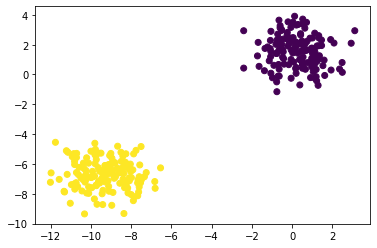

In [ ]:
plt.scatter(feat['X1'],feat['X2'],c=y)

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#scatter-plots

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Graphique interactif sur Jupyter Notebook avec la commande %matplotlib notebook

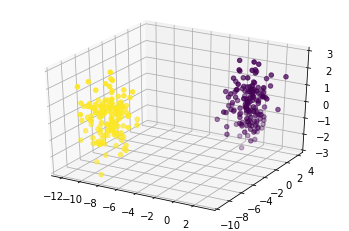

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

# Encoder et Decoder

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [ ]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [ ]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Notez comment toutes les données sont utilisées ! Il n'y a pas de "bonne" réponse ici
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [ ]:
# scaled_data

In [ ]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.3350


In [ ]:
encoded_2dim = encoder.predict(scaled_data)

In [ ]:
encoded_2dim

array([[8.91440213e-01, 2.51857162e-01],
       [9.81075227e-01, 1.77900732e-01],
       [1.03662157e+00, 2.29563057e-01],
       [3.99903625e-01, 0.00000000e+00],
       [6.22007310e-01, 2.37653121e-01],
       [5.98191261e-01, 2.79108018e-01],
       [5.33985078e-01, 0.00000000e+00],
       [6.00555062e-01, 2.03309432e-01],
       [6.43046439e-01, 1.03414223e-01],
       [9.43563104e-01, 1.54736236e-01],
       [7.20338702e-01, 2.89480329e-01],
       [5.01972377e-01, 2.31420830e-01],
       [9.43430722e-01, 1.80713326e-01],
       [3.26492280e-01, 1.00770649e-02],
       [5.31238735e-01, 0.00000000e+00],
       [5.46151459e-01, 5.24361953e-02],
       [9.10047531e-01, 1.92040995e-01],
       [1.05894685e+00, 1.46680161e-01],
       [1.19974005e+00, 2.62777597e-01],
       [6.93813324e-01, 0.00000000e+00],
       [6.10282183e-01, 2.41265863e-01],
       [1.17390859e+00, 2.81055599e-01],
       [6.59734786e-01, 8.00904408e-02],
       [2.36066476e-01, 0.00000000e+00],
       [4.838042

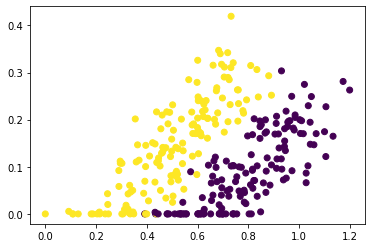

In [ ]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)